In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
import cv2
import keras
import tensorflow as tf
import keras.backend as K

import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [14]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
keras.utils.get_custom_objects()['get_f1'] = get_f1


In [115]:
from tensorflow.keras.models import load_model

# mel_spectrogram [techno & semi ]-[sigmoid] =  '/content/drive/MyDrive/Colab Notebooks/test2/mel_sigmoid_semi$techno.h5'
# mfcc_spectrogram [techno & semi ]- [sigmoid] = '/content/drive/MyDrive/Colab Notebooks/test2/mfcc_sigmoid_semi$techno.h5'
# cqt_spectrogram [techno & semi ]-[sigmoid] = '/content/drive/MyDrive/Colab Notebooks/test2/cqt_sigmoid_semi$techno.h5'

with keras.utils.custom_object_scope({'get_f1': get_f1}):
    model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/test2/xxmfcc_sigmoid_semi$techno.h5')


In [116]:
# model.summary()

# All merge


In [117]:
# def mel_spectrogram(path,saving_location):
#   y,sr = librosa.load(path)
#   mels = librosa.feature.melspectrogram(y=y,sr=sr)
#   # fig = plt.Figure()
#   # canvas = FigureCanvas(fig)
#   plt.imshow(librosa.power_to_db(mels,ref=np.max))
#   plt.axis('off')
#   plt.savefig(saving_location,bbox_inches='tight')
#   plt.clf()
#   return saving_location

In [118]:
# import sklearn
# from sklearn import preprocessing

# def mfcc_generate(audio,saving_location):
#   samples, sample_rate = librosa.load(audio, sr=None)
#   mfcc = librosa.feature.mfcc(y=samples, sr=sample_rate)

#   # Center MFCC coefficient dimensions to the mean and unit variance
#   mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
#   librosa.display.specshow(mfcc, sr=sample_rate)
#   plt.savefig(saving_location, bbox_inches='tight', pad_inches=0)
#   plt.clf()
#   # print("*********XXXXXXXXXX****************")
#   return saving_location

In [119]:
# from PIL import Image

# def merge_images(path1,path2,path3,saving_location):
#   # Load the images
#   image1 = Image.open(path1)
#   image2 = Image.open(path2)
#   image3 = Image.open(path3)
#   print("original dimensions : ",image1.size, image2.size, image3.size)

#   # Resize the images to the same height and width
#   width, height = 530, 400
#   # Resize the images to the same height and width
#   # width, height = 500, 500
#   image1 = image1.resize((width, height))
#   image2 = image2.resize((width, height))
#   image3 = image3.resize((width, height))
#   print("new dimensions : ",image1.size, image2.size, image3.size)

#   # Merge the images horizontally
#   result = Image.new('RGB', (width * 3, height))
#   result.paste(im=image1, box=(0, 0))
#   result.paste(im=image2, box=(width, 0))
#   result.paste(im=image3, box=(width * 2, 0))

#   # Save the merged image
#   result.save(saving_location)
#   return saving_location

In [120]:
# def preprocess(filename):
#   testing_input = test_path+filename

#   mel = mel_spectrogram(testing_input,'mel_'+filename.split('.')[0])
#   cqt = CQT_spectrogram(testing_input,'cqt_'+filename.split('.')[0])
#   mfcc = mfcc_generate(testing_input,'mfcc_'+filename.split('.')[0])
#   image_path = merge_images(mfcc+'.png',cqt+'.png',mel+'.png','merge_'+filename.split('.')[0]+'.png')

#   img = cv2.imread(image_path)
#   # img = cv2.resize(img,(370,270))
#   # print(img.shape)

#   rgba_img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
#   # print(rgba_img.shape)

#   img1= rgba_img.reshape(1,rgba_img.shape[0],rgba_img.shape[1],rgba_img.shape[2])
#   # print(img1.shape)
#   return img1

# Only CQT


In [121]:
# def CQT_spectrogram(audio,saving_location):
#   # Load audio file
#   y, sr = librosa.load(audio)

#   # Compute CQT spectrogram
#   C = np.abs(librosa.cqt(y, sr=sr))

#   # Plot CQT spectrogram
#   plt.figure(figsize=(8, 6))
#   librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),sr=sr) #, x_axis='time', y_axis='cqt_note'
#   plt.savefig(saving_location,bbox_inches='tight')
#   # plt.clf()
#   # # plt.colorbar(format='%+2.0f dB')
#   # # plt.tight_layout()
#   # plt.show()
#   return saving_location


In [122]:
# def cqt_preprocess(filename):
#   # testing_input = '/content/drive/MyDrive/Colab Notebooks/test2/Audio _full-dataset/Reuben/liber/Liber 1.m4a'
#   testing_input = test_path+filename

#   cqt = CQT_spectrogram(testing_input,'cqt_'+filename.split('.')[0])

#   img = cv2.imread(cqt+'.png')
#   img = cv2.resize(img,(300,300))
#   print(img.shape)

#   rgba_img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
#   print(rgba_img.shape)

#   img1= rgba_img.reshape(1,rgba_img.shape[0],rgba_img.shape[1],rgba_img.shape[2])
#   print(img1.shape)
#   return img1

# Only Mel

In [123]:
# def mel_spectrogram(path,saving_location):
#   y,sr = librosa.load(path)
#   mels = librosa.feature.melspectrogram(y=y,sr=sr)
#   # fig = plt.Figure()
#   # canvas = FigureCanvas(fig)
#   plt.imshow(librosa.power_to_db(mels,ref=np.max))
#   plt.axis('off')
#   plt.savefig(saving_location,bbox_inches='tight')
#   # plt.clf()
#   return saving_location

In [124]:
# def mel_preprocess(filename):
#   testing_input = test_path+filename

#   mel = mel_spectrogram(testing_input,'mel_'+filename.split('.')[0])

#   img = cv2.imread(mel+'.png')
#   img = cv2.resize(img,(300,300))
#   # print(img.shape)

#   rgba_img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
#   # print(rgba_img.shape)

#   img1= rgba_img.reshape(1,rgba_img.shape[0],rgba_img.shape[1],rgba_img.shape[2])
#   # print(img1.shape)
#   return img1

# Only MFCC

In [125]:
import sklearn
from sklearn import preprocessing

def mfcc_generate(audio,saving_location):
  samples, sample_rate = librosa.load(audio, sr=None)
  mfcc = librosa.feature.mfcc(y=samples, sr=sample_rate)

  # Center MFCC coefficient dimensions to the mean and unit variance
  mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
  librosa.display.specshow(mfcc, sr=sample_rate)
  plt.savefig(saving_location, bbox_inches='tight', pad_inches=0)
  # plt.clf()
  return saving_location

In [126]:
def mfcc_preprocess(filename):
  testing_input = test_path+filename

  mfcc = mfcc_generate(testing_input,'mfcc_'+filename.split('.')[0])

  img = cv2.imread(mfcc+'.png')
  img = cv2.resize(img,(420,350))
  print(img.shape)

  rgba_img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
  print(rgba_img.shape)

  img1= rgba_img.reshape(1,rgba_img.shape[0],rgba_img.shape[1],rgba_img.shape[2])
  print(img1.shape)
  return img1

In [127]:
# classes = {'ab': 0, 'acro': 1, 'ampi': 2, 'chrom': 3, 'circum': 4, 'cred': 5, 'derm': 6, 'funct': 7, 'icon': 8, 'imag': 9, 'infra': 10, 'intra': 11, 'kine': 12, 'lab': 13, 'lact': 14, 'liber': 15, 'lingu': 16, 'luco': 17, 'man': 18, 'medi': 19, 'melan': 20, 'memor': 21, 'meta': 22, 'omni': 23, 'over': 24, 'pan': 25, 'para': 26, 'poly': 27, 'struct': 28, 'therm': 29, 'vert': 30}
classes = {'semi': 0, 'techno': 1}


In [128]:
test_path = '/content/drive/MyDrive/Colab Notebooks/test2/Testingmodel_audio/'
files = os.listdir(test_path)
files[13:],len(files)

(['semi-related (4).m4a',
  'semi-related (1).m4a',
  'semi-related (2).m4a',
  'semi-related (3).m4a',
  'techno (5).m4a',
  'techno (1).m4a',
  'techno (2).m4a',
  'techno (3).m4a',
  'techno (4).m4a'],
 22)

In [129]:
# i=8
# img1 = mfcc_preprocess(files[i])
# files[i]

(350, 420, 3)
(350, 420, 4)
(1, 350, 420, 4)
1/1 [==============================] - 0s 206ms/step
[0.29906905 0.68485403]
[0 1]
semi 29.906904697418213
maxValue for word :  techno  | true value :  semi-related (4).m4a
techno 68.48540306091309
_________________________________________________________-X_________________________________________________________________________________
(350, 420, 3)
(350, 420, 4)
(1, 350, 420, 4)
1/1 [==============================] - 0s 82ms/step
[0.8620473  0.05640935]
[1 0]
maxValue for word :  semi  | true value :  semi-related (1).m4a
semi 86.20473146438599
techno 5.640934780240059
_________________________________________________________-X_________________________________________________________________________________
(350, 420, 3)
(350, 420, 4)
(1, 350, 420, 4)
1/1 [==============================] - 0s 88ms/step
[0.90576375 0.08372574]
[1 0]
maxValue for word :  semi  | true value :  semi-related (2).m4a
semi 90.57637453079224
techno 8.3725735545158

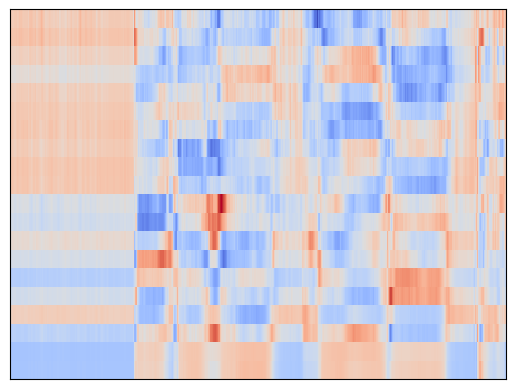

In [130]:
n_files = files[13:]
for i in n_files:
  img1 = mfcc_preprocess(i)
  value = model.predict(img1)
  print(value[0])
  top_4_indices = np.argsort(value[0])[-4:]
  print(top_4_indices)

  for key, val in classes.items():
      if val == value.argmax():
          print('maxValue for word : ',key, ' | true value : ',i)
      if val in top_4_indices:
          print(key, value[0][val]*100)
  print("_________________________________________________________-X_________________________________________________________________________________")

In [131]:
value = model.predict(img1)


1/1 [==============================] - 0s 56ms/step


In [132]:
value[0]

array([0.64831764, 0.5852214 ], dtype=float32)

In [133]:
top_4_indices = np.argsort(value[0])[-2:]
top_4_indices

array([1, 0])

In [134]:
# value[0][classes['liber']]*100

In [135]:
for key, val in classes.items():
    if val == value.argmax():
        print('maxValue for word : ',key)
    if val in top_4_indices:
        print(key, value[0][val]*100)

maxValue for word :  semi
semi 64.83176350593567
techno 58.522140979766846


In [136]:
# only cqt results for semi

# maxValue for word :  semi
# semi 99.9513328075409
# techno 0.09199848864227533

In [137]:
# maxValue for word :  semi
# semi 99.58141446113586
# techno 10.12757495045662

# maxValue for word :  semi
# semi 99.76509809494019
# techno 5.754007771611214

# maxValue for word :  semi
# semi 99.05173778533936
# techno 19.18366253376007

# maxValue for word :  semi
# semi 98.49485158920288
# techno 32.094207406044006

In [138]:
## Only mel results for semi

# maxValue for word :  semi
# semi 39.47076499462128
# techno 20.19532024860382

# maxValue for word :  semi
# semi 51.68606638908386
# techno 13.007877767086029

# semi 9.698550403118134
# maxValue for word :  techno
# techno 79.28907871246338

# maxValue for word :  semi
# semi 56.22655153274536
# techno 12.545844912528992